# Becoming a content creater hasn't always been that hard

It's 2022, you are full of good purposes for this new year. In particular, you want to start a YouTube channel and ideally earn some money via ads. However, there are so many channels and videos out there that you have no idea where to even start. Fortunately, another good purpose for this year is to become a Data Scientist, and you want to merge your interest to become the best at both.

You are provided a subset of YouTube videos from some of the giant channels in two categories: "Gaming" and "How-to & Style". The dataset contains a lot of videos, with data on those videos including their titles, their total number of views as of 2019, their tags and descriptions, etc. The data is, in gzip-compressed format, contained in the `data/` folder, as the file `youtube.csv.gz`.

In [1]:
import pandas as pd
import numpy as np

In [2]:
youtube = pd.read_csv('youtube.csv.gz', compression='gzip')

In [3]:
youtube.head()

,channel,upload_date,title,tags,duration,view_count,average_rating,height,width,channel_cat
0,PewDiePie,2013-03-04,A NEW ADVENTURE! - Kingdom Hearts (1) w/ Pewds,"['lets', 'play', 'horror', 'game', 'walkthroug...",1126.0,2541550.0,4.886102,720.0,1280.0,Gaming
1,PewDiePie,2013-03-04,SAVING PRIVATE PEWDS - Conker's Bad Fur Day (15),"['lets', 'play', 'horror', 'game', 'walkthroug...",903.0,1727646.0,4.951531,720.0,1280.0,Gaming
2,PewDiePie,2013-03-04,THE WORST SCARE! - Amnesia: Rain (4),"['lets', 'play', 'horror', 'game', 'walkthroug...",806.0,1402747.0,4.962706,720.0,1280.0,Gaming
3,PewDiePie,2013-03-03,Nova / Sp00n / Cry / Pewds - Worms Revolution ...,"['lets', 'play', 'horror', 'game', 'walkthroug...",909.0,4348296.0,4.937665,720.0,1280.0,Gaming
4,PewDiePie,2013-03-03,SEXIEST HORROR EVER - Amnesia: Rain (3),"['lets', 'play', 'horror', 'game', 'walkthroug...",834.0,1410659.0,4.957545,720.0,1280.0,Gaming


In [4]:
type(youtube['upload_date'][0])

str

In [5]:
youtube['upload_date'] = pd.to_datetime(youtube['upload_date'])
youtube['upload_date']

0        2013-03-04
1        2013-03-04
2        2013-03-04
3        2013-03-03
4        2013-03-03
            ...    
139502   2010-02-23
139503   2010-02-22
139504   2010-02-21
139505   2010-02-20
139506   2010-02-20
Name: upload_date, Length: 139507, dtype: datetime64[ns]

In [6]:
youtube['upload_date'].dt.year

0         2013
1         2013
2         2013
3         2013
4         2013
          ... 
139502    2010
139503    2010
139504    2010
139505    2010
139506    2010
Name: upload_date, Length: 139507, dtype: int64

In [7]:
youtube['year'] = youtube['upload_date'].dt.year
youtube['month'] = youtube['upload_date'].dt.month

youtube.head()

,channel,upload_date,title,tags,duration,view_count,average_rating,height,width,channel_cat,year,month
0,PewDiePie,2013-03-04,A NEW ADVENTURE! - Kingdom Hearts (1) w/ Pewds,"['lets', 'play', 'horror', 'game', 'walkthroug...",1126.0,2541550.0,4.886102,720.0,1280.0,Gaming,2013,3
1,PewDiePie,2013-03-04,SAVING PRIVATE PEWDS - Conker's Bad Fur Day (15),"['lets', 'play', 'horror', 'game', 'walkthroug...",903.0,1727646.0,4.951531,720.0,1280.0,Gaming,2013,3
2,PewDiePie,2013-03-04,THE WORST SCARE! - Amnesia: Rain (4),"['lets', 'play', 'horror', 'game', 'walkthroug...",806.0,1402747.0,4.962706,720.0,1280.0,Gaming,2013,3
3,PewDiePie,2013-03-03,Nova / Sp00n / Cry / Pewds - Worms Revolution ...,"['lets', 'play', 'horror', 'game', 'walkthroug...",909.0,4348296.0,4.937665,720.0,1280.0,Gaming,2013,3
4,PewDiePie,2013-03-03,SEXIEST HORROR EVER - Amnesia: Rain (3),"['lets', 'play', 'horror', 'game', 'walkthroug...",834.0,1410659.0,4.957545,720.0,1280.0,Gaming,2013,3


In [8]:
youtube = youtube.sort_values('upload_date', ascending = True)

In [9]:
youtube

,channel,upload_date,title,tags,duration,view_count,average_rating,height,width,channel_cat,year,month
121791,Braille Skateboarding,2005-12-28,Aaron Kyro www.brailleskateboarding.com,"['how', 'to', 'games', 'online', 'free', 'tric...",230.0,517076.0,4.962113,360.0,480.0,Howto & Style,2005,12
76831,Rockstar Games,2006-08-11,Rockstar's Finest Volume 1,"['games', 'video', 'xbox', 'pc']",85.0,76103.0,4.865500,240.0,320.0,Gaming,2006,8
76832,Rockstar Games,2006-08-11,Bully Trailer,"['game', 'games', 'trailer']",68.0,4034698.0,4.724019,360.0,480.0,Gaming,2006,8
76830,Rockstar Games,2006-08-22,Bully Trailer 2,"['game', 'games', 'trailer']",61.0,2668914.0,4.561938,240.0,320.0,Gaming,2006,8
76829,Rockstar Games,2006-09-19,"Bully Trailer 3 - ""Glorious Institution""","['Game', 'trailer']",117.0,1127291.0,3.945416,240.0,320.0,Gaming,2006,9
...,...,...,...,...,...,...,...,...,...,...,...,...
43954,Jess No Limit,2019-10-02,JESS JADI BABU LEMON SI RAJA MAGE!! AUTO BANTA...,[],618.0,578568.0,4.882490,1080.0,1920.0,Gaming,2019,10
101598,Hong Giang DIY Slime,2019-10-03,Mixing Random Things into Slime! Relaxing with...,[],730.0,99632.0,4.237654,1080.0,1920.0,Howto & Style,2019,10
135400,Sadhguru,2019-10-03,Sadhguru at Harvard University – Youth and Tru...,[],4108.0,169379.0,4.876111,1080.0,1920.0,Howto & Style,2019,10
107247,Kabita's Kitchen,2019-10-03,डिजिटल समोसा | Noodles Samosa | Chinese Samosa...,[],628.0,65919.0,4.859893,1080.0,1920.0,Howto & Style,2019,10


## Dataset description

Each row of the dataset corresponds to one video that was uploaded to YouTube. There are 11 columns:
'channel', 'upload_date', 'title', 'categories', 'tags', 'duration',
       'view_count', 'average_rating', 'height', 'width', 'channel_cat'.
- `channel`: The channel (account) on which the video was uploaded.
- `upload_date`: The date on which the video was uploaded (Pandas Timestamp object).
- `title`: The title of the video.
- `tags`: A list of words that describe the video.
- `duration`: The duration of the video in seconds.
- `view_count`: The number of times the video was watched.
- `average_rating`: The average score with which the viewers rated the video (1-5).
- `height`: The height of the video in pixels.
- `width`: The width of the video in pixels.
- `channel_cat`: The category of the channel on which this video was uploaded. This dataset only contains videos from channels from the 'Gaming' and the 'Howto & Style' category.

# Task A - Data Exploration

## Growth
You would first like to know whether YouTube in general is the right platform to invest time into. Please analyze the growth of youtube in terms of videos, channels, categories.

In [10]:
import matplotlib.pyplot as plt

if we assume that the growth that is meant here is the number of videos or the number of channels uploaded each day

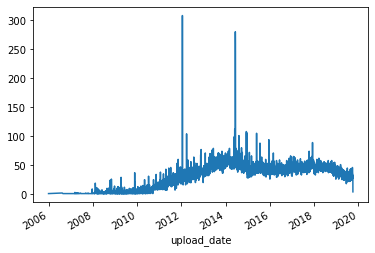

In [11]:
num_of_videos_per_day = youtube.groupby(['upload_date'])['title'].count()
num_of_videos_per_day.plot()
plt.show()

We could aggregate on weeks or month to get a better view of the trend

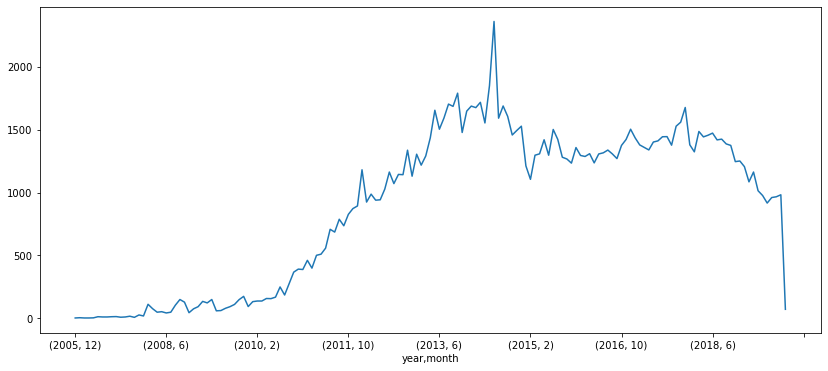

In [12]:
num_of_videos_per_month = youtube.groupby(['year','month'])['title'].count()

plt.figure(figsize=(14,6))
num_of_videos_per_month.plot()
plt.show()

From the above trend we can see a clear decline at the last period, So let's focus only on that period since it's really relavent to
analyze what is happenning recently

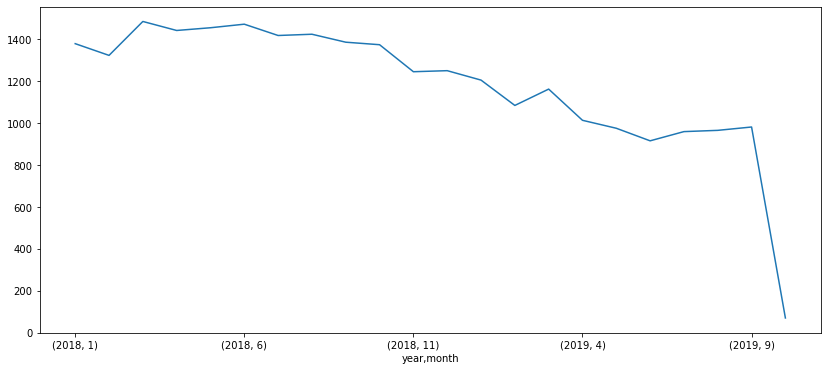

In [13]:
youtube_2018_2019 = youtube.loc[youtube['year'] >= 2018]
num_of_videos_per_month = youtube_2018_2019.groupby(['year','month'])['title'].count()

plt.figure(figsize=(14,6))
num_of_videos_per_month.plot()
plt.show()

In [14]:
'the number of videos in 2019: {0}'.format(youtube.loc[youtube['year'] == 2019,'title'].count())

'the number of videos in 2019: 9338'

if we compare this number with the peak number of videos, we will find a clear decline

In [15]:
youtube.groupby(['year'])['title'].count()


year
2005        1
2006        7
2007      114
2008      883
2009     1301
2010     2731
2011     7929
2012    12987
2013    18309
2014    20216
2015    15704
2016    15966
2017    17356
2018    16665
2019     9338
Name: title, dtype: int64

In [16]:
print('the number of videos in 2019: {0}'.format(youtube.loc[youtube['year'] == 2019,'title'].count()))
print('the number of videos in the peak: {0}'.format(youtube.groupby(['year'])['title'].count().max()))

the number of videos in 2019: 9338
the number of videos in the peak: 20216


if we start to perform the same analysis on the number of channels, we will find almost the same trend

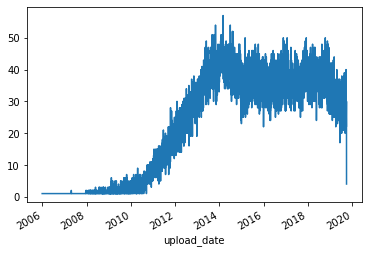

In [17]:
num_of_channels_per_day = youtube.groupby(['upload_date'])['channel'].nunique()
num_of_channels_per_day.plot()
plt.show()

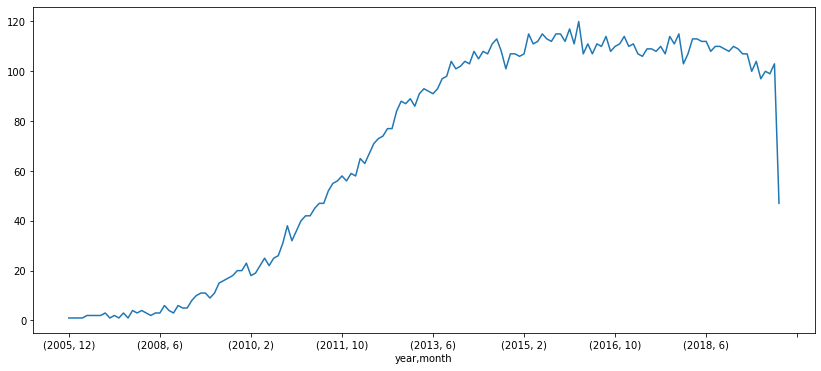

In [18]:
num_of_channels_per_month = youtube.groupby(['year','month'])['channel'].nunique()

plt.figure(figsize=(14,6))
num_of_channels_per_month.plot()
plt.show()

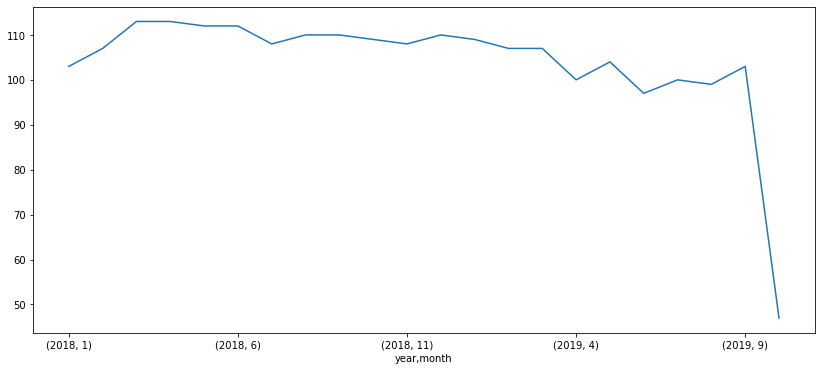

In [19]:
num_of_channels_per_month = youtube_2018_2019.groupby(['year','month'])['channel'].nunique()

plt.figure(figsize=(14,6))
num_of_channels_per_month.plot()
plt.show()

In [20]:
youtube.loc[youtube['year'] == 2019,'channel'].nunique()

119

In [21]:
print('the number of channels in 2019: {0}'.format(youtube.loc[youtube['year'] == 2019,'channel'].nunique()))
print('the number of channels in the peak: {0}'.format(youtube.groupby(['year'])['channel'].nunique().max()))

the number of channels in 2019: 119
the number of channels in the peak: 138


From what we have seen from the trends above the number of videos has experienced a growth then saturated then started to decline
at the end. So in general if we consider the platform as a whole it won't profitable to invest into

We have only two categories based on the information provided, So we won't use it as a measure but as a dimension on which we will analyze the number of videos, to check whether we may have different trends based on the category 

In [22]:
youtube['channel_cat'].unique()

array(['Howto & Style', 'Gaming'], dtype=object)

What about the number of videos uploaded in each category

In [23]:
number_of_videos_per_category = youtube.groupby(['channel_cat','upload_date'])['title'].nunique()
number_of_videos_per_category

channel_cat    upload_date
Gaming         2006-08-11      2
               2006-08-22      1
               2006-09-19      1
               2006-10-13      1
               2006-12-13      1
                              ..
Howto & Style  2019-09-29     21
               2019-09-30     20
               2019-10-01     21
               2019-10-02     26
               2019-10-03      4
Name: title, Length: 7852, dtype: int64

In [24]:
number_of_videos_per_category = number_of_videos_per_category.unstack("channel_cat")
number_of_videos_per_category

channel_cat,Gaming,Howto & Style
upload_date,,
2005-12-28,NaN,1.0
2006-08-11,2.0,NaN
2006-08-22,1.0,NaN
2006-09-19,1.0,NaN
2006-10-13,1.0,NaN
...,...,...
2019-09-29,10.0,21.0
2019-09-30,7.0,20.0
2019-10-01,12.0,21.0


<AxesSubplot:xlabel='upload_date'>

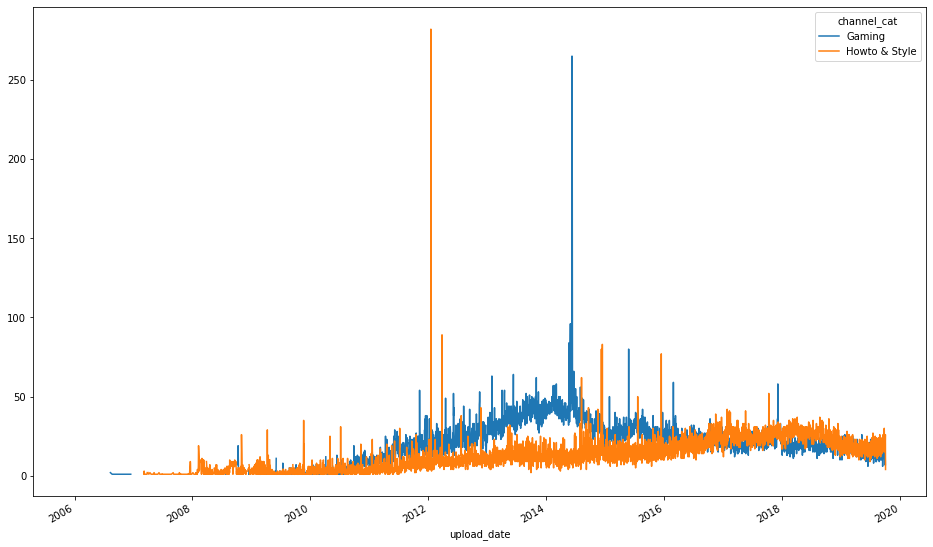

In [25]:
number_of_videos_per_category.plot(figsize = (16, 10))

From what we see, it's almost the same trend but the reach the peak at different point in time

Let's focus again on the last two years since the are relevant

In [26]:
number_of_videos_per_category['year'] = number_of_videos_per_category.index.year
number_of_videos_per_category['month'] = number_of_videos_per_category.index.month
number_of_videos_per_category

channel_cat,Gaming,Howto & Style,year,month
upload_date,,,,
2005-12-28,NaN,1.0,2005,12
2006-08-11,2.0,NaN,2006,8
2006-08-22,1.0,NaN,2006,8
2006-09-19,1.0,NaN,2006,9
2006-10-13,1.0,NaN,2006,10
...,...,...,...,...
2019-09-29,10.0,21.0,2019,9
2019-09-30,7.0,20.0,2019,9
2019-10-01,12.0,21.0,2019,10


In [27]:
number_of_videos_per_category_monthly = number_of_videos_per_category.groupby(['year','month'])['Gaming','Howto & Style'].sum()
number_of_videos_per_category_monthly

C:\Users\acer\AppData\Local\Temp/ipykernel_14724/4259617492.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  number_of_videos_per_category_monthly = number_of_videos_per_category.groupby(['year','month'])['Gaming','Howto & Style'].sum()


channel_cat  Gaming  Howto & Style
year month                        
2005 12         0.0            1.0
2006 8          3.0            0.0
     9          1.0            0.0
     10         1.0            0.0
     12         2.0            0.0
...             ...            ...
2019 6        407.0          505.0
     7        439.0          519.0
     8        419.0          545.0
     9        385.0          596.0
     10        19.0           51.0

[157 rows x 2 columns]

In [28]:
number_of_videos_per_category_monthly_2018_2019 = number_of_videos_per_category_monthly[np.in1d(number_of_videos_per_category_monthly.index.get_level_values(0), [2018, 2019])]
number_of_videos_per_category_monthly_2018_2019

channel_cat  Gaming  Howto & Style
year month                        
2018 1        590.0          776.0
     2        516.0          806.0
     3        567.0          900.0
     4        614.0          811.0
     5        610.0          836.0
     6        629.0          836.0
     7        605.0          805.0
     8        526.0          887.0
     9        569.0          796.0
     10       619.0          729.0
     11       553.0          671.0
     12       584.0          648.0
2019 1        593.0          599.0
     2        567.0          515.0
     3        604.0          556.0
     4        495.0          514.0
     5        446.0          529.0
     6        407.0          505.0
     7        439.0          519.0
     8        419.0          545.0
     9        385.0          596.0
     10        19.0           51.0

<AxesSubplot:xlabel='year,month'>

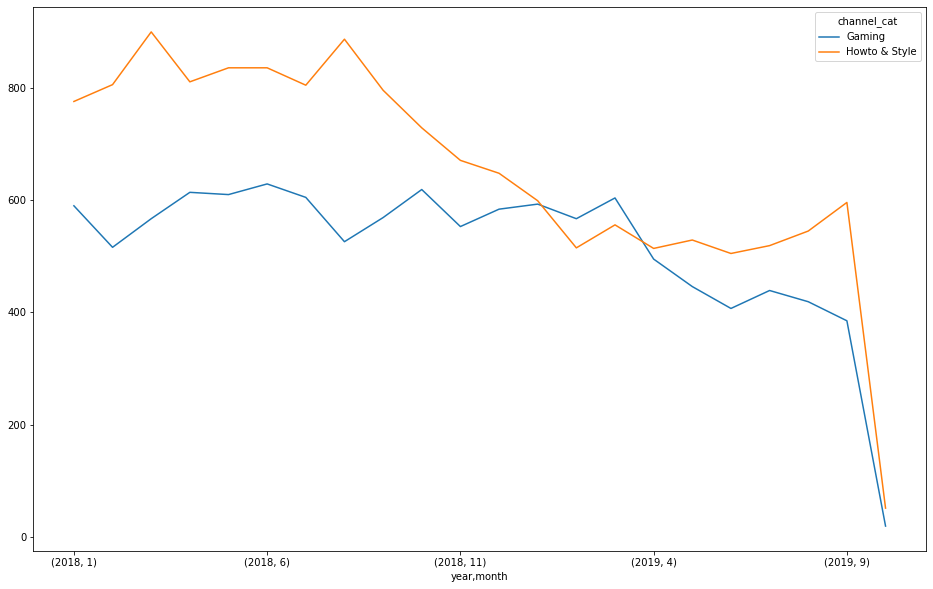

In [29]:
number_of_videos_per_category_monthly_2018_2019.plot(figsize = (16, 10))

What we conclude in general is that youtube is not the right platform to invest as the number of videos overtime has decrease recently
and even when we consider the channel category, this doesn't change 

##  Cash Money

You are a content creator and you are starting a brand new channel (congratulatons!). Assuming ads profict are directly proportional to the number of views of a video, how should you invest your time to get the most profit. How did this change throughout the years?

In [41]:
youtube_tags = youtube.copy()
youtube_tags.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139507 entries, 121791 to 105473
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   channel         139507 non-null  object        
 1   upload_date     139507 non-null  datetime64[ns]
 2   title           139507 non-null  object        
 3   tags            139507 non-null  object        
 4   duration        139507 non-null  float64       
 5   view_count      139507 non-null  float64       
 6   average_rating  139507 non-null  float64       
 7   height          139507 non-null  float64       
 8   width           139507 non-null  float64       
 9   channel_cat     139507 non-null  object        
 10  year            139507 non-null  int64         
 11  month           139507 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(2), object(4)
memory usage: 17.9+ MB


In [42]:
#here we get the list of unique tags

unique_tags = set()

def modify_tags(df):
    row_tags = df['tags'].replace('\'' , '')
    row_tags = row_tags.strip('][').split(',')
    return row_tags

def tags_split(df, unique_tags=unique_tags):
    row_tags = df['tags']
    unique_tags.update(set(row_tags))

    

In [43]:
# run this code once 
youtube_tags['tags'] = youtube_tags.apply(modify_tags, axis=1)
type(youtube_tags['tags'][0])

list

In [44]:
youtube_tags.apply(tags_split, axis=1)

unique_tags = list(unique_tags)
print(len(unique_tags))

268


In [45]:
unique_tags = unique_tags[1:]

#### This task takes alot of time, This approach worked on another project. however this one took alot of time as the number of tags in each list is not constant. 
#### A good approach to solve this problem if only the desired output "MOST POPULAR TAGS" is to concatinate all tags into one huge list and to aggregate whatever is needed.
#### This solution will be used however the first technique must be kept as it will be used later on in developing the model.

In [47]:
youtube_tags.head()

,channel,upload_date,title,tags,duration,view_count,average_rating,height,width,channel_cat,year,month
121791,Braille Skateboarding,2005-12-28,Aaron Kyro www.brailleskateboarding.com,"[how, to, games, online, free, tricks, m...",230.0,517076.0,4.962113,360.0,480.0,Howto & Style,2005,12
76831,Rockstar Games,2006-08-11,Rockstar's Finest Volume 1,"[games, video, xbox, pc]",85.0,76103.0,4.865500,240.0,320.0,Gaming,2006,8
76832,Rockstar Games,2006-08-11,Bully Trailer,"[game, games, trailer]",68.0,4034698.0,4.724019,360.0,480.0,Gaming,2006,8
76830,Rockstar Games,2006-08-22,Bully Trailer 2,"[game, games, trailer]",61.0,2668914.0,4.561938,240.0,320.0,Gaming,2006,8
76829,Rockstar Games,2006-09-19,"Bully Trailer 3 - ""Glorious Institution""","[Game, trailer]",117.0,1127291.0,3.945416,240.0,320.0,Gaming,2006,9


#### Creating List that contains all the tags and perfoming tag aggregation

In [48]:
#youtube_tags["tags"][0] + youtube_tags["tags"][1]
huge_tag_list = []
for i in range(len(youtube_tags)):
    huge_tag_list += youtube_tags['tags'][i]
print(len(huge_tag_list))

582523


In [49]:
view_count_per_tag = {}

view_count_per_tag = {tag: huge_tag_list.count(tag) for tag in unique_tags}

view_count_per_tag

{' food': 2244,
 'family friendly': 205,
 'lifehacks': 35,
 ' walkthrough': 5299,
 ' Grand Theft Auto 5': 1658,
 'call of duty': 1627,
 'Commentary': 65,
 ' makeup': 3429,
 ' Minecraft (Video Game)': 1174,
 ' cooking': 2311,
 'xbox': 110,
 'PC': 608,
 ' kitchen': 2519,
 ' tnt': 2574,
 ' new': 7020,
 ' black': 1949,
 'showcase': 79,
 ' showcase': 4050,
 'Tutorial': 1724,
 ' kid friendly': 2636,
 'walkthrough': 272,
 'useful things': 14,
 ' lets': 2397,
 'horror': 375,
 ' lets play': 2655,
 'to': 781,
 'minecraft': 8893,
 'Funny': 1991,
 'beauty': 2295,
 'Minecraft': 2636,
 ' multiplayer': 5313,
 'trolling': 298,
 ' Funny': 2830,
 ' how': 2220,
 'live': 165,
 'free': 110,
 ' beauty': 5155,
 ' map': 5281,
 'Comedy': 149,
 ' review': 3218,
 'adventure': 148,
 ' mod': 6234,
 ' makeup tutorial': 1618,
 ' kids': 2288,
 'fun': 559,
 'hilarious': 414,
 ' fail': 2647,
 'cooking': 377,
 ' ps4': 1773,
 ' moments': 3752,
 'how to': 1634,
 'pvp': 644,
 'lets play': 296,
 'yt:quality=high': 67,
 'ps4

In [131]:
import operator

top_10_tags = [key for key,val in sorted(view_count_per_tag.items(), key=operator.itemgetter(1), reverse=True)][:20]
top_10_tags


[' funny',
 ' gameplay',
 ' game',
 ' how to',
 ' tutorial',
 'minecraft',
 ' games',
 ' gaming',
 ' playthrough',
 ' commentary',
 ' new',
 ' play',
 ' tips',
 ' mod',
 ' tricks',
 ' video',
 ' Gameplay',
 ' comedy',
 ' multiplayer',
 ' walkthrough']

In [132]:
youtube_tags[top_10_tags] = 0
youtube_tags

,channel,upload_date,title,tags,duration,view_count,average_rating,height,width,channel_cat,...,new,play,tips,mod,tricks,video,Gameplay,comedy,multiplayer,walkthrough
121791,Braille Skateboarding,2005-12-28,Aaron Kyro www.brailleskateboarding.com,"[how, to, games, online, free, tricks, m...",230.0,517076.0,4.962113,360.0,480.0,Howto & Style,...,0,0,0,0,0,0,0,0,0,0
76831,Rockstar Games,2006-08-11,Rockstar's Finest Volume 1,"[games, video, xbox, pc]",85.0,76103.0,4.865500,240.0,320.0,Gaming,...,0,0,0,0,0,0,0,0,0,0
76832,Rockstar Games,2006-08-11,Bully Trailer,"[game, games, trailer]",68.0,4034698.0,4.724019,360.0,480.0,Gaming,...,0,0,0,0,0,0,0,0,0,0
76830,Rockstar Games,2006-08-22,Bully Trailer 2,"[game, games, trailer]",61.0,2668914.0,4.561938,240.0,320.0,Gaming,...,0,0,0,0,0,0,0,0,0,0
76829,Rockstar Games,2006-09-19,"Bully Trailer 3 - ""Glorious Institution""","[Game, trailer]",117.0,1127291.0,3.945416,240.0,320.0,Gaming,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43954,Jess No Limit,2019-10-02,JESS JADI BABU LEMON SI RAJA MAGE!! AUTO BANTA...,[],618.0,578568.0,4.882490,1080.0,1920.0,Gaming,...,0,0,0,0,0,0,0,0,0,0
101598,Hong Giang DIY Slime,2019-10-03,Mixing Random Things into Slime! Relaxing with...,[],730.0,99632.0,4.237654,1080.0,1920.0,Howto & Style,...,0,0,0,0,0,0,0,0,0,0
135400,Sadhguru,2019-10-03,Sadhguru at Harvard University – Youth and Tru...,[],4108.0,169379.0,4.876111,1080.0,1920.0,Howto & Style,...,0,0,0,0,0,0,0,0,0,0
107247,Kabita's Kitchen,2019-10-03,डिजिटल समोसा | Noodles Samosa | Chinese Samosa...,[],628.0,65919.0,4.859893,1080.0,1920.0,Howto & Style,...,0,0,0,0,0,0,0,0,0,0


In [133]:
#here we use the function add_tags to apply 0,1 to each column of tags if the source contain one or more

def add_tags(df,unique_tags=unique_tags):
    df[unique_tags] = [1 if x in df['tags'] else 0 for x in unique_tags]
    return df[unique_tags]

In [134]:
youtube_tags[top_10_tags] = youtube_tags.apply(lambda x: add_tags(x,top_10_tags), axis=1)

In [135]:
view_count_per_tag_yearly = {}
for tag in top_10_tags:
    view_count_per_tag_yearly[tag] = youtube_tags[youtube_tags[tag] == 1].groupby(['year'])['view_count'].mean()

view_count_per_tag_yearly = pd.DataFrame(view_count_per_tag_yearly)
view_count_per_tag_yearly

,funny,gameplay,game,how to,tutorial,minecraft,games,gaming,playthrough,commentary,new,play,tips,mod,tricks,video,Gameplay,comedy,multiplayer,walkthrough
year,,,,,,,,,,,,,,,,,,,,
2005,NaN,NaN,NaN,NaN,NaN,NaN,5.170760e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.170760e+05,NaN,NaN,NaN,NaN,NaN
2006,NaN,NaN,NaN,NaN,NaN,NaN,3.351806e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.610300e+04,NaN,NaN,NaN,NaN
2007,NaN,NaN,1.675391e+06,NaN,6.158154e+05,NaN,1.850521e+06,NaN,NaN,NaN,NaN,7.504800e+04,1.494933e+05,NaN,NaN,1.675391e+06,NaN,NaN,NaN,NaN
2008,8.558567e+04,NaN,1.297892e+05,4.821930e+05,4.214274e+05,NaN,2.812851e+05,1.990188e+05,1.990188e+05,1.990188e+05,1.118568e+05,4.458867e+05,1.506250e+04,NaN,3.517158e+05,2.403084e+05,NaN,1.990188e+05,NaN,NaN
2009,1.822065e+05,1.878856e+05,1.059768e+05,6.543619e+05,2.617356e+05,NaN,2.337315e+05,1.770152e+05,1.626956e+05,1.527767e+05,7.902800e+04,1.629260e+05,2.036242e+05,NaN,1.685164e+05,2.612017e+05,NaN,2.368025e+05,6.900800e+04,NaN
2010,3.834845e+05,2.396284e+05,1.300007e+06,1.838310e+05,3.339988e+05,1.719232e+06,1.089809e+06,3.489043e+05,3.199086e+05,3.374735e+05,8.911196e+05,1.172287e+06,4.403660e+05,NaN,4.704959e+05,7.099679e+05,1.210006e+05,3.108384e+05,1.502536e+06,4.487135e+05
2011,1.163951e+06,3.126528e+05,4.506442e+05,5.563696e+05,4.688216e+05,8.442470e+05,2.913630e+05,6.822037e+05,1.152121e+06,7.740120e+05,5.789217e+05,5.831375e+05,3.357407e+05,6.407267e+05,3.481239e+05,3.454988e+05,4.372381e+05,1.346147e+06,6.246329e+05,5.838374e+05
2012,1.443616e+06,9.329700e+05,1.283846e+06,9.828743e+05,6.739505e+05,5.226414e+05,6.302030e+05,8.358677e+05,2.089460e+06,1.189715e+06,6.081799e+05,1.698190e+06,3.117173e+05,2.504900e+06,2.851197e+05,6.760570e+05,3.476462e+05,1.941082e+06,7.068818e+05,1.784936e+06
2013,1.414037e+06,1.448854e+06,1.594713e+06,8.033271e+05,6.677324e+05,1.316165e+06,6.649228e+05,1.675023e+06,2.146720e+06,2.156879e+06,8.874237e+05,2.874879e+06,6.621909e+05,2.367026e+06,5.827196e+05,2.417594e+06,3.087100e+06,2.702008e+06,1.845461e+06,1.873993e+06


<AxesSubplot:xlabel='year'>

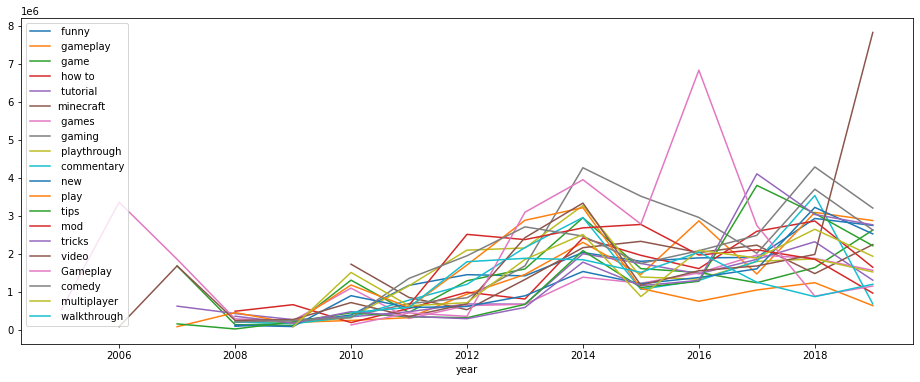

In [136]:
view_count_per_tag_yearly.plot(figsize=(16,6))

#### How should you invest your time to get the most profit. How did this change throughout the years?
##### The above graph answers the question by dicussing how tags -which is a way to describe the field in which the video contains- have changed over time. This is shown in the data where the tag "funny" and different formats of "gaming" have took the entire chart. In other words, investing time in the above 10 catgeories will gurantee the desired viewers content.

# Task B - Modeling

## Optimizing views

You want to optimize your videos to get the maximum number of views. Is it possible to predict the number of views given the features of the dataset? Try to build a model to do so.

In [171]:
#creating new dataframe that the model will work on
whole_data = youtube_tags.drop(columns=['channel', 'upload_date', 'title', 'tags']).copy()
whole_data.head()

,duration,view_count,average_rating,height,width,channel_cat,year,month,funny,gameplay,...,new,play,tips,mod,tricks,video,Gameplay,comedy,multiplayer,walkthrough
121791,230.0,517076.0,4.962113,360.0,480.0,Howto & Style,2005,12,0,0,...,0,0,0,0,1,0,0,0,0,0
76831,85.0,76103.0,4.865500,240.0,320.0,Gaming,2006,8,0,0,...,0,0,0,0,0,1,0,0,0,0
76832,68.0,4034698.0,4.724019,360.0,480.0,Gaming,2006,8,0,0,...,0,0,0,0,0,0,0,0,0,0
76830,61.0,2668914.0,4.561938,240.0,320.0,Gaming,2006,8,0,0,...,0,0,0,0,0,0,0,0,0,0
76829,117.0,1127291.0,3.945416,240.0,320.0,Gaming,2006,9,0,0,...,0,0,0,0,0,0,0,0,0,0


In [172]:
whole_data = whole_data[whole_data['year'] == 2019]

<AxesSubplot:xlabel='month'>

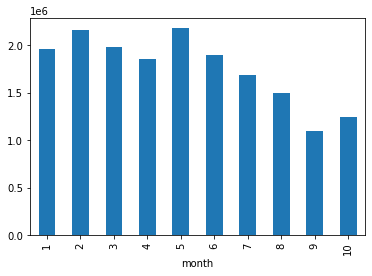

In [173]:
whole_data.groupby('month')['view_count'].mean().plot(kind='bar')

In [174]:
# mapping channel_cat to 0,1 values so the model can work on and identify

# temp_df = pd.DataFrame({'channel_cat': youtube_tags.channel_cat.unique(), 'Category':range(len(youtube_tags.channel_cat.unique()))})
temp_df = {'Howto & Style': 0, 'Gaming': 1}
temp_df

{'Howto & Style': 0, 'Gaming': 1}

In [175]:
# whole_data = whole_data.merge(right= temp_df, how= 'left', left_on= 'channel_cat', right_on='channel_cat')
whole_data['Category'] = [temp_df[item] for item in whole_data['channel_cat']]

In [176]:
whole_data

,duration,view_count,average_rating,height,width,channel_cat,year,month,funny,gameplay,...,play,tips,mod,tricks,video,Gameplay,comedy,multiplayer,walkthrough,Category
105551,645.0,472587.0,4.911685,1080.0,1920.0,Howto & Style,2019,1,0,0,...,0,0,0,0,0,0,0,0,0,0
56816,1974.0,1756921.0,4.970758,1080.0,1920.0,Gaming,2019,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1127,120.0,1137500.0,4.931588,1080.0,1920.0,Gaming,2019,1,0,0,...,0,0,0,0,0,0,0,0,0,1
137576,388.0,275138.0,4.766654,1080.0,1920.0,Howto & Style,2019,1,0,0,...,0,0,0,0,0,0,0,0,0,0
101944,828.0,154572.0,4.504344,1080.0,1920.0,Howto & Style,2019,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43954,618.0,578568.0,4.882490,1080.0,1920.0,Gaming,2019,10,0,0,...,0,0,0,0,0,0,0,0,0,1
101598,730.0,99632.0,4.237654,1080.0,1920.0,Howto & Style,2019,10,0,0,...,0,0,0,0,0,0,0,0,0,0
135400,4108.0,169379.0,4.876111,1080.0,1920.0,Howto & Style,2019,10,0,0,...,0,0,0,0,0,0,0,0,0,0
107247,628.0,65919.0,4.859893,1080.0,1920.0,Howto & Style,2019,10,0,0,...,0,0,0,0,0,0,0,0,0,0


In [177]:
target = whole_data[['view_count']]
whole_data = whole_data.drop(["view_count",'channel_cat'],axis=1)

In [178]:
whole_data.head()

,duration,average_rating,height,width,year,month,funny,gameplay,game,how to,...,play,tips,mod,tricks,video,Gameplay,comedy,multiplayer,walkthrough,Category
105551,645.0,4.911685,1080.0,1920.0,2019,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56816,1974.0,4.970758,1080.0,1920.0,2019,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1127,120.0,4.931588,1080.0,1920.0,2019,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
137576,388.0,4.766654,1080.0,1920.0,2019,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101944,828.0,4.504344,1080.0,1920.0,2019,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [179]:
whole_data.isna().sum()

duration          0
average_rating    0
height            0
width             0
year              0
month             0
 funny            0
 gameplay         0
 game             0
 how to           0
 tutorial         0
minecraft         0
 games            0
 gaming           0
 playthrough      0
 commentary       0
 new              0
 play             0
 tips             0
 mod              0
 tricks           0
 video            0
 Gameplay         0
 comedy           0
 multiplayer      0
 walkthrough      0
Category          0
dtype: int64

Let's use first a baseline to use for comparison with models that I am going to use

In [180]:
from sklearn.linear_model import LinearRegression
# get the locations
from sklearn.model_selection import train_test_split 
xtrain, xval, ytrain, yval = train_test_split(whole_data, target, test_size=0.2, random_state=0)

In [181]:
avg_score =  np.mean(ytrain)[0]
preds = [avg_score] * len(yval)
preds

[1782142.7979919678,
 1782142.7979919678,
 1782142.7979919678,
 1782142.7979919678,
 1782142.7979919678,
 1782142.7979919678,
 1782142.7979919678,
 1782142.7979919678,
 1782142.7979919678,
 1782142.7979919678,
 1782142.7979919678,
 1782142.7979919678,
 1782142.7979919678,
 1782142.7979919678,
 1782142.7979919678,
 1782142.7979919678,
 1782142.7979919678,
 1782142.7979919678,
 1782142.7979919678,
 1782142.7979919678,
 1782142.7979919678,
 1782142.7979919678,
 1782142.7979919678,
 1782142.7979919678,
 1782142.7979919678,
 1782142.7979919678,
 1782142.7979919678,
 1782142.7979919678,
 1782142.7979919678,
 1782142.7979919678,
 1782142.7979919678,
 1782142.7979919678,
 1782142.7979919678,
 1782142.7979919678,
 1782142.7979919678,
 1782142.7979919678,
 1782142.7979919678,
 1782142.7979919678,
 1782142.7979919678,
 1782142.7979919678,
 1782142.7979919678,
 1782142.7979919678,
 1782142.7979919678,
 1782142.7979919678,
 1782142.7979919678,
 1782142.7979919678,
 1782142.7979919678,
 1782142.7979

### using avg revenue as a baseline

In [182]:
mse_avg = np.square(np.subtract(preds,yval['view_count'].values)).mean()
mse_avg

19902220925147.293

### Yes it's possible to build a model to predict the view count. In the next section Desicion Tree Regresssor will be used.

In [183]:
from sklearn.tree import DecisionTreeRegressor

In [184]:
model = DecisionTreeRegressor(max_depth=3)
model.fit(xtrain, ytrain)

DecisionTreeRegressor(max_depth=3)

In [185]:
ypred_val = model.predict(xval)
ypred_val

array([1598491.62773319, 1598491.62773319, 1598491.62773319, ...,
       1598491.62773319, 1598491.62773319, 1598491.62773319])

In [191]:
mse_dt = np.square(np.subtract(ypred_val,yval['view_count'].values)).mean()
1 - mse_dt/mse_avg

0.15554503055483382

In [187]:
from sklearn.metrics import r2_score

r2_score(yval['view_count'].values, ypred_val)

0.14525548720827275

##### Hyper parameter tuning

In [193]:
max_depth_grid = np.arange(start=1, stop=20, step=1)

param_select = {}
for step in max_depth_grid:
    model = DecisionTreeRegressor(max_depth=step)
    model.fit(xtrain, ytrain)
    ypred_val = model.predict(xval)
    param_select[step] = r2_score(yval['view_count'].values, ypred_val)
param_select
    

{1: 0.08880294973526914,
 2: 0.11365787782551251,
 3: 0.14525548720827275,
 4: 0.1395168371346983,
 5: 0.14952914388516847,
 6: 0.11746822683021252,
 7: 0.14582604478417382,
 8: 0.10856370426370754,
 9: 0.13669631219175815,
 10: -0.034428455457832685,
 11: 0.10301299520657325,
 12: -0.08502682517206894,
 13: 0.029245270942313994,
 14: -0.29102382000618765,
 15: -0.3593506794100352,
 16: -0.1396136348136281,
 17: -0.14958607444432914,
 18: -0.16303354778983636,
 19: -0.1811855896729544}

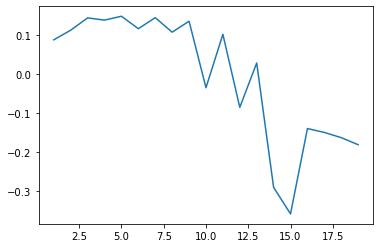

In [194]:
plt.plot(list(param_select.keys()), list(param_select.values()) )

## Follow the trends
Since 2019 tags are the only key to increase the view count. <br>
You decide to use a Random Forest classifier among 2019 data to predict whether a video has a high view count (defined as being larger than the median of the view counts in the training set) or a low view count (defined as being smaller or equal to the median of the view counts in the training set).
To avoid data leakage divide training and test set by channel (use random state 0).

1. What are the performance of your classifier? What would you do if the classifier predicts your tags as ‘high view count’?
2. You want to focus on a single tag, which tag do you choose to make a video on?
3. Do you have any suggestions to improve this model? 

# Task C - Graphs

In order to become the best content creator in the world, you need to understand which channels are around and their similarities.

We have created for you two undirected and unweighted graphs, where in each graph, each channel has a node and similar channels have edges connecting them. In one graph, the similarity between two channels is based on how similar their video descriptions are, while in the other, the similarity is based on how similar their video tags are. We will call the former $G_{text}$ and the latter $G_{tags}$.

In [ ]:
from networkx import from_numpy_array
import json
g_text_adj = np.loadtxt(open('data/g_text_adj.csv', 'r'), delimiter=',', skiprows=0)
g_tags_adj = np.loadtxt(open('data/g_tags_adj.csv', 'r'), delimiter=',', skiprows=0)
channel_to_index = json.load(open('data/channel_indices.json', 'r'))
g_text = from_numpy_array(g_text_adj)
g_tags = from_numpy_array(g_tags_adj)

ModuleNotFoundError: No module named 'networkx'

## Content Diversity

Which graph has a greater diversity? _Hint_: the diameter of a graph might say something about it.

For each category, which channel is the most representative of the contents of all channels in that category? In other words, given a category, if you had to choose a channel which represents a summary of all the channels in the category, which would you choose and why?

## Communities

You want to understand whether there are communities of channels for each category and graph. (_Hint_: Networkx Kernighan-Lin bisection)

Calculate the probability P(community|category) for each community and category within each graph. Design a metric, using the four P(community|category) values in a graph, whose value would be 1 for the ideal graph and 0 for the worst graph. Calculate this metric for both graphs and compare the two. What do the results say about how representative tags and descriptions are regarding the channel categories? Are tags better suited, or descriptions?